# Task 3: Classification and Association Rule Mining

## **Part A: Decision Tree classifier**

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

___
### 1. Load Dataset

In [18]:
# load_data function
def load_data(filepath):
    df = pd.read_csv(filepath)
    X = df.drop(['species', 'species_encoded'], axis=1)  # drop original and encoded labels from features
    y = df['species_encoded']  # use encoded numeric labels as target
    return X, y

#### *Explanation:*  
Load the preprocessed Iris dataset from CSV and separate features and target. This ensures the model has input features (X) and labels (y) for training.
___

### 2. Split Data into Train/Test

In [19]:
def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

#### *Explanation:*  
Divide the dataset into training and testing sets to evaluate model performance on unseen data. Typically, 80% is used for training and 20% for testing.
___

In [20]:
def evaluate_classifier(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1_score': f1_score(y_test, y_pred, average='weighted')
    }
    return metrics, model

### 3. Train and Evaluate Classifier

#### *Explanation:*  
Train classifiers (Decision Tree and KNN) on the training set and predict on the test set. Compute metrics such as accuracy, precision, recall, and F1-score to assess performance.
___

### 4. Visualize Decision Tree

In [21]:
def visualize_tree(model, feature_names, class_names):
    plt.figure(figsize=(15,10))
    plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True)
    plt.show()

In [22]:
if __name__ == "__main__":
    # Load data
    X, y = load_data('C:\\Users\\Admin\\Desktop\\iris_preprocessed.csv')
    
    # Split data
    X_train, X_test, y_train, y_test = split_data(X, y)
    
    # Feature and class names
    feature_names = X.columns.tolist()
    class_names = y.unique().astype(str).tolist()
    
    # Decision Tree
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_metrics, dt_model = evaluate_classifier(dt_model, X_train, X_test, y_train, y_test)
    
    print("Decision Tree Metrics:", dt_metrics)
    

Decision Tree Metrics: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}


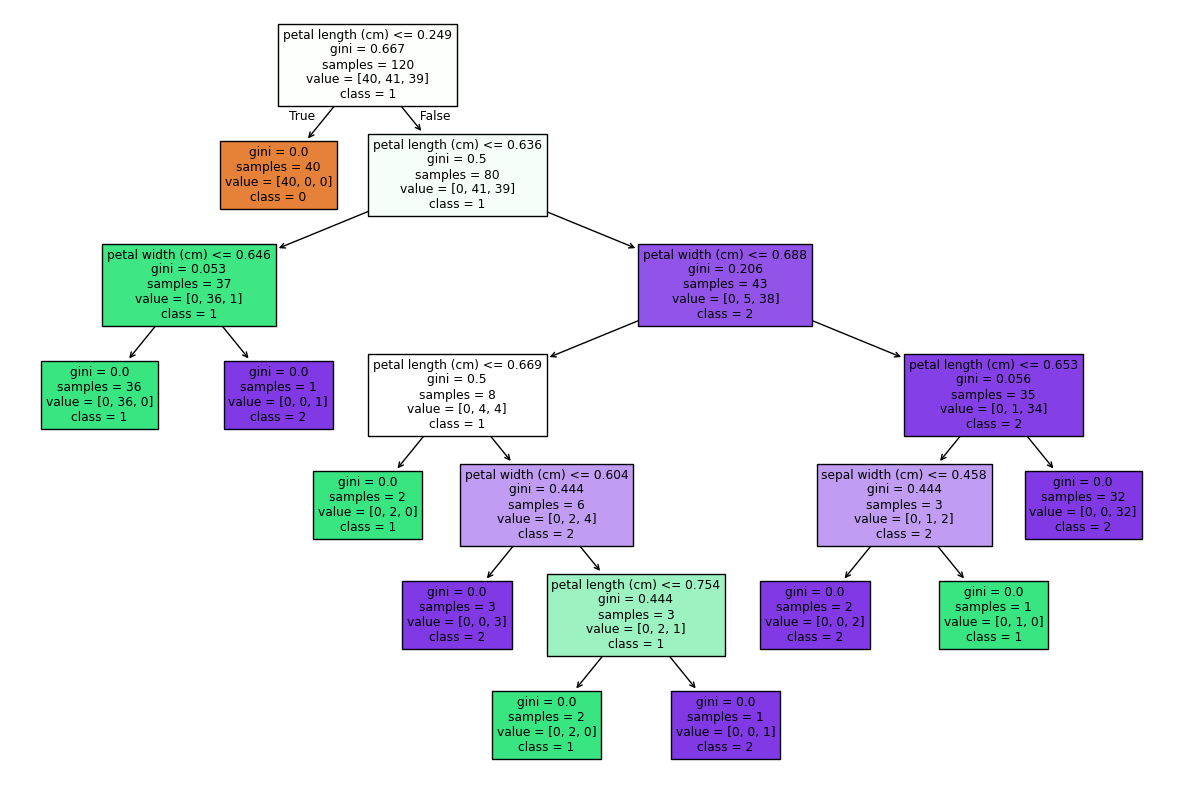

In [23]:
 # Visualize Decision Tree
visualize_tree(dt_model, feature_names, class_names)

#### *Explanation:*  
Plot the trained Decision Tree to interpret how features are used to make classification decisions. Visualization helps understand model structure and decision rules.
___

### 5. Compare Decision Tree with  KNN

In [24]:
# KNN (k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_metrics, _ = evaluate_classifier(knn_model, X_train, X_test, y_train, y_test)
print("KNN Metrics:", knn_metrics)

KNN Metrics: {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}


In [25]:
# Comparison
print("\nComparison:")
for metric in dt_metrics.keys():
    print(f"{metric}: Decision Tree={dt_metrics[metric]:.3f}, KNN={knn_metrics[metric]:.3f}")


Comparison:
accuracy: Decision Tree=1.000, KNN=1.000
precision: Decision Tree=1.000, KNN=1.000
recall: Decision Tree=1.000, KNN=1.000
f1_score: Decision Tree=1.000, KNN=1.000


#### *Explanation:*  
Compare metrics of Decision Tree and KNN to determine which model performs better. Metrics provide insights into strengths and weaknesses of each approach.

### *Obseration:*  
After training both classifiers, we observed the following performance metrics:
The performance metrics for both classifiers were identical:

| Metric     | Decision Tree | KNN  |
|------------|---------------|------|
| Accuracy   | 1.000         | 1.000|
| Precision  | 1.000         | 1.000|
| Recall     | 1.000         | 1.000|
| F1-score   | 1.000         | 1.000|

Both Decision Tree and KNN achieved perfect classification on this preprocessed dataset. This indicates that the features were highly separable, and either model could be reliably used for classifying Iris species in this case.  
However, Decision Trees offer the added benefit of interpretability through visualization, whereas KNN is a simpler instance-based method that can be more sensitive to noise in larger datasets.
___

## **Part B: Association Rule Mining**

## 1. Apriori implementation

In [26]:
import random
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

###  Generate Synthetic Transactional Data  

In [27]:
def generate_transactions(n_transactions=40, seed=42):
    random.seed(seed)
    items_pool = ['milk', 'bread', 'beer', 'diapers', 'eggs', 'cheese', 'butter', 
                  'cereal', 'juice', 'coffee', 'tea', 'soda', 'chips', 'yogurt', 
                  'apples', 'bananas', 'chocolate', 'cookies', 'tomatoes', 'onions']
    
    # Define frequent co-occurring items
    pattern1 = ['milk', 'bread']
    pattern2 = ['diapers', 'beer']
    
    transactions = []
    for _ in range(n_transactions):
        basket = random.choices(items_pool, k=random.randint(3, 8))
        
        # Inject patterns with some probability
        if random.random() < 0.3:
            basket.extend(pattern1)
        if random.random() < 0.2:
            basket.extend(pattern2)
            
        transactions.append(list(set(basket)))  # remove duplicates
    return transactions

#### *Explanation:*  

Create 20–50 transactions, each containing 3–8 items randomly chosen from a pool of 20 items. Inject frequent co-occurring patterns like `['milk', 'bread']` and `['diapers', 'beer']` with certain probabilities to ensure meaningful associations in the dataset.
___

###  Encode Transactions 

In [28]:
def encode_transactions(transactions):
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    return df

#### *Explanation:*  

Convert the list of transactions into a one-hot encoded pandas DataFrame using `TransactionEncoder`. This format is required for the Apriori algorithm to identify frequent itemsets efficiently.
___

###  Generate Association Rules

In [29]:
def generate_rules(df, min_support=0.2, min_confidence=0.5):
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=min_confidence)
    rules_sorted = rules.sort_values(by='lift', ascending=False)
    return rules_sorted

#### *Explanation:*  

Apply the Apriori algorithm on the encoded DataFrame to find frequent itemsets with a minimum support threshold. Generate association rules using a minimum confidence threshold, then sort them by lift to highlight the strongest and most interesting associations.
___

### Main Execution

In [30]:
if __name__ == "__main__":
    # Generate synthetic transactions
    transactions = generate_transactions(n_transactions=40, seed=42)
    
    # Encode transactions
    df_encoded = encode_transactions(transactions)
    
    # Generate rules
    rules = generate_rules(df_encoded, min_support=0.2, min_confidence=0.5)
    

In [31]:
# Display top 5 rules by lift
print("Top 5 Association Rules by Lift:\n")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5))


Top 5 Association Rules by Lift:

      antecedents    consequents  support  confidence      lift
8    (milk, soda)        (bread)    0.200    1.000000  1.818182
10         (soda)  (milk, bread)    0.200    0.727273  1.711230
9   (bread, soda)         (milk)    0.200    0.888889  1.616162
1          (beer)      (diapers)    0.275    0.785714  1.496599
2       (diapers)         (beer)    0.275    0.523810  1.496599


#### *Explanation:*  

Sequentially run the transaction generation, encoding, and rule generation. Print the top 5 association rules by lift. Analyze the strongest rule, discussing its implications for retail recommendations, using confidence and lift to indicate rule strength.
___

## 2. Rule analysis

___
### Analysis of Association Rule: `(milk, soda) → (bread)`

- **Support:** 0.20 → 20% of all transactions contain milk and soda together with bread.  
- **Confidence:** 1.00 → Every transaction that contains both milk and soda also contains bread.  
- **Lift:** 1.82 → Customers buying milk and soda are 1.82 times more likely to also buy bread compared to random chance.

**Implications for Retail:**
- This rule suggests a strong association between buying milk, soda, and bread. A retailer could use this information to **optimize product placement**, such as placing bread near milk and soda in the store to encourage additional purchases.
- It can also inform **cross-selling or bundling strategies**: offering promotions like “Buy milk and soda, get a discount on bread” could increase sales of bread.
- This insight can further guide **inventory management**, ensuring sufficient stock for items that are frequently purchased together.
___

In [32]:
df_encoded.to_csv('C:\\Users\\Admin\\Desktop\\Generated_transactions.csv', index=False)